# TASK 1
## NEWS TITLE CLASSIFICATION
In every task, I will show the step how to get the model and I will show the prediction step after that

### Step 1: Import package
In this step, I use some package such as NLTK and Keras

In [1]:
import pandas as pd, numpy as np
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import string
import re
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.models import load_model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


### Step 2: Import file for training and testing

In [2]:
data=pd.read_csv('News Title.csv', encoding='ISO-8859-1', sep=';')
print(data)

          No                                         News Title       Category
0          1  Google+ rolls out 'Stories' for tricked out ph...     Technology
1          2                    Dov Charney's Redeeming Quality       Business
2          3   White God adds Un Certain Regard to the Palm Dog  Entertainment
3          4  Google shows off Androids for wearables, cars,...     Technology
4          5         China May new bank loans at 870.8 bln yuan       Business
5          6  Firefox Windows 8 Metro Browser Development Ca...     Technology
6          7                     Destiny Beta Kicks Off In July     Technology
7          8         Apple & Google's Motorola end legal battle     Technology
8          9  UPDATE 2-Facebook Q1 revenue grows 72 percent ...       Business
9         10  Selena Gomez, Justin Bieber Spotted at the Sam...  Entertainment
10        11  Titanfall: Gameplay basics, release date, DLC ...     Technology
11        12  Angela Bassett to direct Whitney Houst

In [3]:
data_judul=data['News Title']
print(data_judul)

0        Google+ rolls out 'Stories' for tricked out ph...
1                          Dov Charney's Redeeming Quality
2         White God adds Un Certain Regard to the Palm Dog
3        Google shows off Androids for wearables, cars,...
4               China May new bank loans at 870.8 bln yuan
5        Firefox Windows 8 Metro Browser Development Ca...
6                           Destiny Beta Kicks Off In July
7               Apple & Google's Motorola end legal battle
8        UPDATE 2-Facebook Q1 revenue grows 72 percent ...
9        Selena Gomez, Justin Bieber Spotted at the Sam...
10       Titanfall: Gameplay basics, release date, DLC ...
11       Angela Bassett to direct Whitney Houston biopi...
12       German Museum Lets You Talk to van Gogh's Regr...
13                Iraq crisis fuels concern for oil prices
14       BC doctor OK, not in quarantine after Ebola ai...
15       GM recalling nearly 29000 Chevrolet Cruzes to ...
16                Local Experts Weigh in on Climate Chan

### Step 3: Pre-processing

In [4]:
#casefolding
judul_lower=[]
for judul in data_judul:
  letters_only = re.sub("[^a-zA-Z]", " ", judul)
  letters_only=letters_only.lower()
  judul_lower.append(letters_only)
print(judul_lower[0])

google  rolls out  stories  for tricked out photo playback


In [5]:
judul_word_tokenize=[]
for judul in judul_lower:
  judul=word_tokenize(judul)
  judul_word_tokenize.append(judul)
print(judul_word_tokenize[0])

['google', 'rolls', 'out', 'stories', 'for', 'tricked', 'out', 'photo', 'playback']


In [6]:
listStopwords=set(['.',',','(',')','?','/','-','?',"'"]+(stopwords.words('english')))

judul_noStopwords=[]
for judul in judul_word_tokenize:
  temp=[]
  for kata in judul:
    if kata not in listStopwords:
      temp.append(kata)
  judul_noStopwords.append(temp)
print(judul_noStopwords[0])

['google', 'rolls', 'stories', 'tricked', 'photo', 'playback']


In [7]:
judul_fix=[]
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer() 
for judul in judul_noStopwords:
  temp=[]
  for kata in judul:
    kata=ps.stem(kata)
    kata=lemmatizer.lemmatize(kata)
    temp.append(kata)
  judul_fix.append(temp)
print(judul_fix[0])

['googl', 'roll', 'stori', 'trick', 'photo', 'playback']


In [8]:
pip install glove_python

     |████████████████████████████████| 266kB 8.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=702645 sha256=8d4daab1ed99103724b5ffedb6a6902be538cc44d3fc7a06286b0ccb17d38f40
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


### Step 4: Feature extraction

In [9]:
#importing the glove library
from glove import Corpus, Glove
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(judul_fix, window=5)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [0]:
glove.add_dictionary(corpus.dictionary)

In [11]:
print (glove.word_vectors[glove.dictionary['save']])

[-0.02362008  0.05458027 -0.14810861  0.02481528  0.47987024]


In [0]:
import random
max_len=max(len(kata) for kata in judul_noStopwords)

def vectorize(dataset, maxlen):
  vectorized_judul=[]
  expected=[]
  for kalimat in dataset:
    sample_vecs=[]
    for kata in kalimat:
      try:
        sample_vecs.append(glove.word_vectors[glove.dictionary[kata]])
      except:
        sample_vecs.append(np.random.uniform(0.0,0.0,5))
    if len(sample_vecs)<maxlen:
      add=maxlen-len(sample_vecs)
      for _ in range(add):
        sample_vecs.append(np.random.uniform(0.0,0.0,5))
    sample_vecs=np.array(sample_vecs)
    vectorized_judul.append(sample_vecs)
  vectorized_judul=np.array(vectorized_judul)
  return vectorized_judul

In [0]:
vektor_judul=vectorize(judul_fix,max_len)
vektor_judul[0]

array([[ 0.8848807 , -1.23089582, -0.61973445, -0.76218805, -0.06789763],
       [ 0.63919636, -0.08347577, -0.75088754,  0.65652268,  0.74498895],
       [ 0.05753406, -0.11515637, -0.20764657, -0.11720404, -0.46809217],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

### Step 5: Splitting data

In [0]:
#splitting data
split_point=int(len(data)*.8)
x_train = vektor_judul[:split_point]
y_train = data['Category'][:split_point]
x_test = vektor_judul[split_point:]
y_test = data['Category'][split_point:]

Y_train=pd.get_dummies(y_train).values
Y_test=pd.get_dummies(y_test).values

### Step 6: Build the model

In [0]:
#Membangun model
model = Sequential()
embedding_dims=5
hidden_dims=10
model.add(Conv1D(filters=10,
                  strides=1,
                  kernel_size=5,
                  padding='valid',
                  activation='relu',
                  input_shape=(max_len, embedding_dims)))
model.add(MaxPooling1D())
model.add(Conv1D(filters=5,
                 strides=1,
                  kernel_size=5,
                  padding='valid',
                  activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(int(hidden_dims), activation='sigmoid'))
model.add(Dense(int(hidden_dims/2), activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0905 19:57:02.224848 139634723424128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 19:57:02.285207 139634723424128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 19:57:02.293201 139634723424128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 19:57:02.348000 139634723424128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0905 19:57:02.404165 139634723424128 deprecation_wrapp

In [0]:
pat = 30 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_acc', patience=pat, verbose=1, mode='max')

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('best_model',monitor='val_acc', verbose=1, save_best_only=True)

### Step 7: Training and testing the model

In [0]:
hasil=model.fit(x_train, Y_train,
         batch_size=5,
         epochs=500,
         verbose=2,
         callbacks=[early_stopping, model_checkpoint],
         validation_data=(x_test, Y_test))
hasil

W0905 19:57:02.610826 139634723424128 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 52428 samples, validate on 13107 samples
Epoch 1/500
 - 111s - loss: 1.2429 - acc: 0.4298 - val_loss: 1.1722 - val_acc: 0.4766

Epoch 00001: val_acc improved from -inf to 0.47662, saving model to best_model
Epoch 2/500
 - 111s - loss: 1.1793 - acc: 0.4761 - val_loss: 1.1470 - val_acc: 0.4875

Epoch 00002: val_acc improved from 0.47662 to 0.48753, saving model to best_model
Epoch 3/500
 - 111s - loss: 1.1389 - acc: 0.5042 - val_loss: 1.0626 - val_acc: 0.5660

Epoch 00003: val_acc improved from 0.48753 to 0.56603, saving model to best_model
Epoch 4/500
 - 111s - loss: 1.0898 - acc: 0.5332 - val_loss: 1.0320 - val_acc: 0.5815

Epoch 00004: val_acc improved from 0.56603 to 0.58152, saving model to best_model
Epoch 5/500
 - 110s - loss: 1.0716 - acc: 0.5381 - val_loss: 1.0010 - val_acc: 0.5917

Epoch 00005: val_acc improved from 0.58152 to 0.59174, saving model to best_model
Epoch 6/500
 - 111s - loss: 1.0526 - acc: 0.5525 - val_loss: 0.9866 - val_acc: 0.5957

Epoch 00006: val_acc 

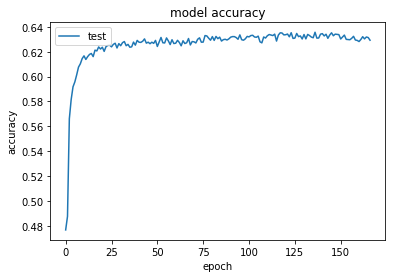

In [0]:
plt.plot(hasil.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

## Classifier
In this part, I will make the classifier for user who want to classify their news title

In [0]:
input_title=('Please input your title here')

In [43]:
listStopwords=set(['.',',','(',')','?','/','-','?',"'"]+(stopwords.words('english')))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer() 
input_data=re.sub("[^a-zA-Z]", " ", input_title)
input_data=input_data.lower()
input_data=word_tokenize(input_data)
temp=[]
for kata in input_data:
  if kata not in listStopwords:
    kata=ps.stem(kata)
    kata=lemmatizer.lemmatize(kata)
    temp.append(kata)
input_fix=[]
input_fix.append(temp)
best_model=load_model('best_model63%')
vektor_input=vectorize(input_fix,3112)
output=best_model.predict_classes(vektor_input)
output=str(output)
if output==('[0]'):
  print('Category for this title is Business')
elif output==('[1]'):
  print('Category for this title is Entertainment')
elif output==('[2]'):
  print('Category for this title is Medical')
elif output==('[3]'):
  print('Category for this title is Technology')
else:
  print('ERROR')

Category for this title is Business
